In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 64 bytes


In [ ]:
!kaggle datasets download alxmamaev/flowers-recognition

 99% 222M/225M [00:01<00:00, 220MB/s]
100% 225M/225M [00:01<00:00, 206MB/s]


In [ ]:
!unzip flowers-recognition.zip

Archive:  flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  i

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
from IPython.display import Image, display
from tqdm import tqdm
import cv2
import random as rn
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

daisy


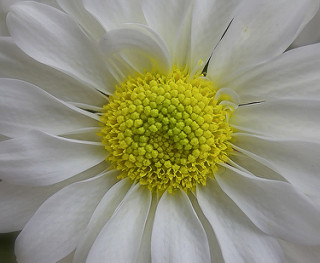



dandelion


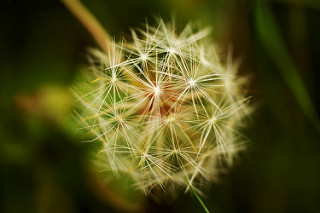



rose


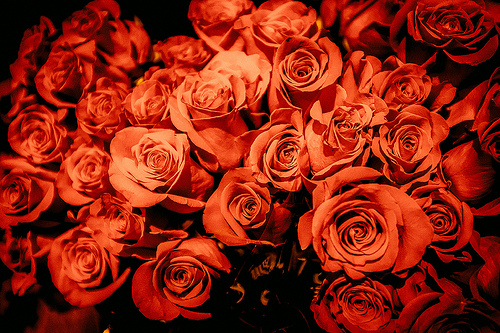



sunflower


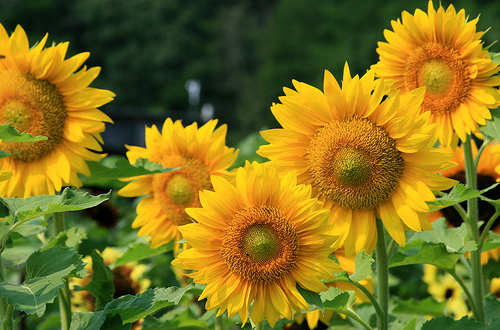



tulip


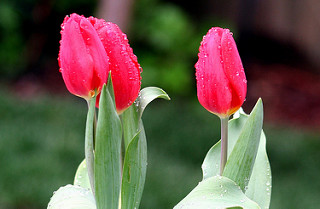

In [ ]:
listOfImageNames = ['/content/flowers/daisy/100080576_f52e8ee070_n.jpg',
                    '/content/flowers/dandelion/10043234166_e6dd915111_n.jpg',
                    '/content/flowers/rose/10503217854_e66a804309.jpg',
                    '/content/flowers/sunflower/1008566138_6927679c8a.jpg',
                    '/content/flowers/tulip/100930342_92e8746431_n.jpg']
labels = ['daisy','dandelion','rose','sunflower','tulip']
for i,imageName in enumerate(listOfImageNames):
    print(labels[i])
    display(Image(filename=imageName))
    print("\n")

In [ ]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range = 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    validation_split=0.2
)

In [ ]:
train_data =  datagen.flow_from_directory(
        "/content/flowers",
        target_size=(150,150),
        batch_size=32,
        subset = 'training',
        class_mode='categorical')

test_data =  datagen.flow_from_directory(
        "/content/flowers",
        target_size=(150,150),
        batch_size=32,
        subset = 'validation',
        class_mode='categorical')

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [ ]:
train_labels = []
traindata = []
for i in range(0,109):
    train_labels.extend(np.array(train_data[i][1]))
    traindata.extend(np.array(train_data[i][0]))
    
test_labels=[]
testdata = []
for i in range(0,27):
    test_labels.extend(np.array(test_data[i][1]))
    testdata.extend(np.array(test_data[i][0]))

In [ ]:
lbls = []
for i in train_labels:
    if all(i == [0.,0.,0.,0.,1.]):
        lbls.append('tulip')
    elif all(i == [0.,0.,0.,1.,0.]):
        lbls.append('sunflower')
    elif all(i == [0.,0.,1.,0.,0.]):
        lbls.append('rose')
    elif all(i == [0.,1.,0.,0.,0.]):
        lbls.append('dendelion')
    elif all(i == [1.,0.,0.,0.,0.]):
        lbls.append('daisy')

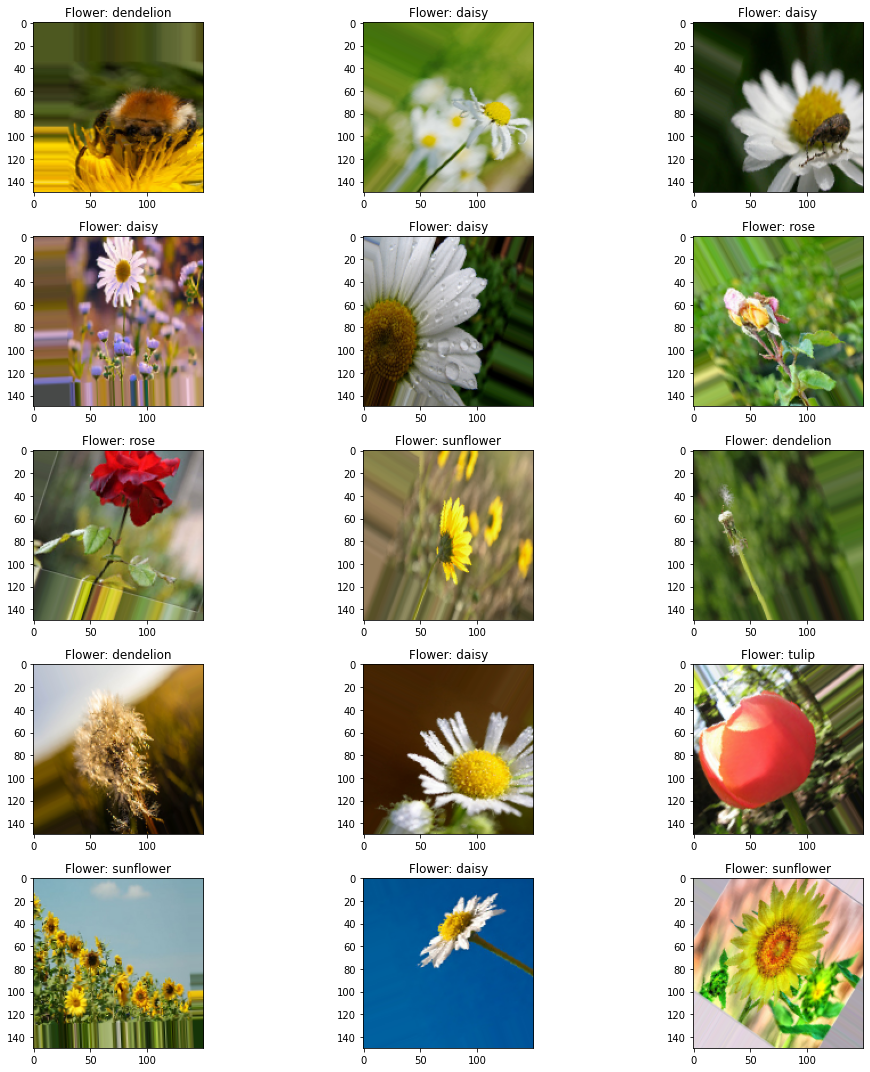

In [ ]:
fig,ax=plt.subplots(5,3)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (3):
        l=rn.randint(0,len(train_labels))
        ax[i,j].imshow(traindata[l])
        ax[i,j].set_title('Flower: '+lbls[l])
        
plt.tight_layout()

In [ ]:
traindata = np.array(traindata)
testdata = np.array(testdata)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [ ]:
traindata.shape


(3457, 150, 150, 3)

In [ ]:
model = Sequential()


In [ ]:
model.add(Conv2D(filters=32,activation='relu',kernel_size=3,input_shape=[150,150,3]))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Conv2D(filters=64,activation='relu',kernel_size=3))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Conv2D(filters=96,activation='relu',kernel_size=3))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Conv2D(filters=96,activation='relu',kernel_size=3))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Flatten())

model.add(Dense(512,activation='relu'))

model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 96)       0

In [ ]:
es = EarlyStopping(monitor='val_loss',patience=3,mode='min')


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.fit(traindata,train_labels,verbose=1,validation_data=(testdata,test_labels),batch_size=128,epochs=5,callbacks=[es])


Epoch 1/5
28/28 [==============================] - 194s 7s/step - loss: 0.7200 - accuracy: 0.7075 - val_loss: 1.0944 - val_accuracy: 0.5756
Epoch 2/5
28/28 [==============================] - 184s 7s/step - loss: 0.7665 - accuracy: 0.7029 - val_loss: 1.2858 - val_accuracy: 0.5012
Epoch 3/5
28/28 [==============================] - 190s 7s/step - loss: 0.8856 - accuracy: 0.6647 - val_loss: 1.1485 - val_accuracy: 0.5744
Epoch 4/5
28/28 [==============================] - 191s 7s/step - loss: 0.7020 - accuracy: 0.7278 - val_loss: 1.1543 - val_accuracy: 0.6023


In [ ]:
losses = model.history.history


In [ ]:
testdata.shape

(860, 150, 150, 3)

In [ ]:
pred=model.predict(testdata)
pred_digits=np.argmax(pred,axis=1)

27/27 [==============================] - 14s 508ms/step


In [ ]:
pred_digits

array([2, 4, 3, 1, 4, 4, 1, 3, 0, 1, 0, 3, 0, 1, 1, 0, 3, 3, 0, 0, 4, 1,
       1, 0, 1, 0, 3, 3, 4, 3, 0, 3, 3, 0, 4, 0, 0, 0, 2, 0, 1, 0, 3, 2,
       1, 1, 4, 3, 1, 3, 4, 1, 3, 3, 2, 4, 3, 0, 3, 4, 4, 4, 2, 4, 1, 3,
       0, 4, 2, 1, 4, 4, 4, 0, 4, 0, 4, 4, 3, 0, 4, 4, 0, 0, 2, 4, 0, 3,
       3, 0, 4, 4, 2, 0, 3, 4, 3, 3, 1, 0, 3, 0, 3, 0, 0, 4, 3, 0, 1, 0,
       3, 0, 0, 1, 4, 0, 0, 4, 4, 3, 2, 3, 3, 3, 3, 2, 4, 4, 1, 0, 0, 0,
       4, 1, 0, 4, 0, 4, 1, 4, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 4, 3, 4, 4,
       1, 1, 3, 1, 1, 4, 3, 4, 3, 0, 4, 1, 0, 3, 1, 1, 0, 0, 0, 2, 4, 1,
       0, 4, 0, 0, 0, 1, 4, 4, 0, 3, 3, 3, 0, 4, 4, 3, 2, 0, 3, 4, 1, 1,
       2, 0, 0, 4, 0, 1, 3, 4, 4, 4, 0, 3, 0, 4, 0, 4, 3, 0, 1, 0, 0, 2,
       1, 4, 1, 3, 1, 3, 3, 0, 3, 4, 0, 3, 4, 1, 0, 2, 4, 4, 4, 1, 1, 3,
       3, 3, 0, 4, 0, 4, 4, 0, 3, 2, 4, 0, 2, 0, 2, 0, 0, 3, 1, 1, 4, 4,
       3, 3, 1, 0, 3, 3, 4, 3, 2, 4, 4, 1, 1, 3, 1, 4, 3, 4, 1, 4, 2, 4,
       0, 0, 1, 4, 0, 4, 3, 0, 4, 1, 1, 3, 4, 4, 2,

In [ ]:
print('The predicted class is:', pred_digits[0])


The predicted class is: 2


In [ ]:
img_height = 150
img_width = 150
# sunflower_url = "/content/flowers/tulip_test.jpg"
# sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img_path = "/content/flowers/dandelion.jpg" # Replace with the path to your image file
img = tf.keras.utils.load_img(
    img_path, target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 38ms/step
This image most likely belongs to daisy with a 40.46 percent confidence.
